# BigMart Sales Prediction sales of product in a perticular store

Properties of products which help in increasing the sales

## Importing the required libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# As the data is numeric lets check if Linear regression works
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We might need to scale the data - Lets use minmax scaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data_file = "../data/datascience/big_mart_sales/Train.csv"
test_data_file = "../data/datascience/big_mart_sales/Test.csv"

train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Basic EDA on Train data to understand it

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations:
- There are a total of 8523 observations with 12 columns
- Null values exist for Item_Weight and Outlet_Size
- Item_Identifier and Outlet_Identifier are Ids and will not contribute in prediction of Item_Outlet_sales which is our output variable.
- Item_Fact_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type are categorical variable.

## Removing the Ids from both train and test set and figuring out the count/percentage of missing values

In [5]:
train_data = train_data.drop(columns=["Item_Identifier", "Outlet_Identifier"], axis=1)
test_data = test_data.drop(columns=["Item_Identifier", "Outlet_Identifier"], axis=1)

In [6]:
train_data.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
(train_data.isna().sum() / train_data.shape[0]) * 100


Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Item_Weight has around 17% missing Values and Outlet_Size has around 28%**
Before we try to address the missing values lets check the distribution, relations etc. to understand the domain of data.

## Univariate Analysis of Categorical Variable

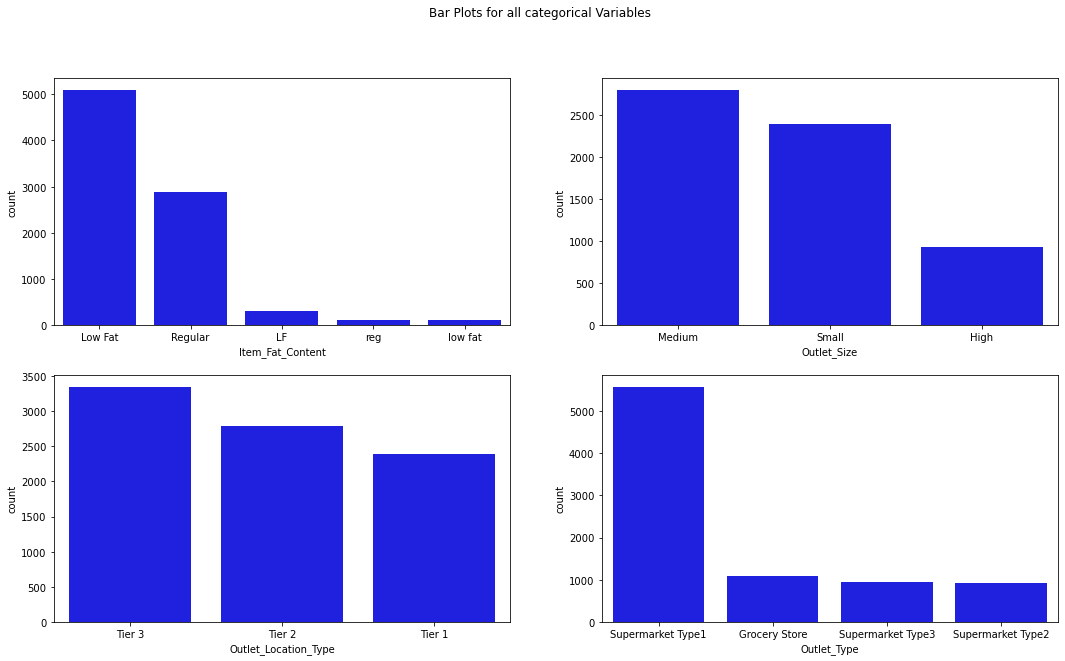

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle("Bar Plots for all categorical Variables")

sns.countplot(ax=axes[0, 0], x="Item_Fat_Content", data=train_data, color="blue",
              order=train_data["Item_Fat_Content"].value_counts().index);

sns.countplot(ax=axes[0, 1], x="Outlet_Size", data=train_data, color="blue",
              order=train_data["Outlet_Size"].value_counts().index);
sns.countplot(ax=axes[1, 0], x="Outlet_Location_Type", data=train_data, color="blue",
              order=train_data["Outlet_Location_Type"].value_counts().index);
sns.countplot(ax=axes[1, 1], x="Outlet_Type", data=train_data, color="blue",
              order=train_data["Outlet_Type"].value_counts().index);

## Observations:
- Error in data in Item_Fat_Content. Seems like there should be only two categories Low Fat and Regular but there are repetitions due to different nomenclature for same categories.
- The most common Outlet_Size is Medium, closely followed by Small and very less High.
- Tier 3 Outlet_Location_Type is most common.
- Outlet_Type has most common type as Supermarket Type1 and small percentages of other types shared almost equally.

## Insight
- As Tier3 location is most common it corroborates the information of having small and medium outlet sizes in high numbers.
- With Tier1 locations being least common, High size (generally found in Tier1 locations) are low. The data is consistent with general consensus of general store business.

**Lets see about Item_Type and Outlet_Establishment_Year (while its int it is categorical variable)**


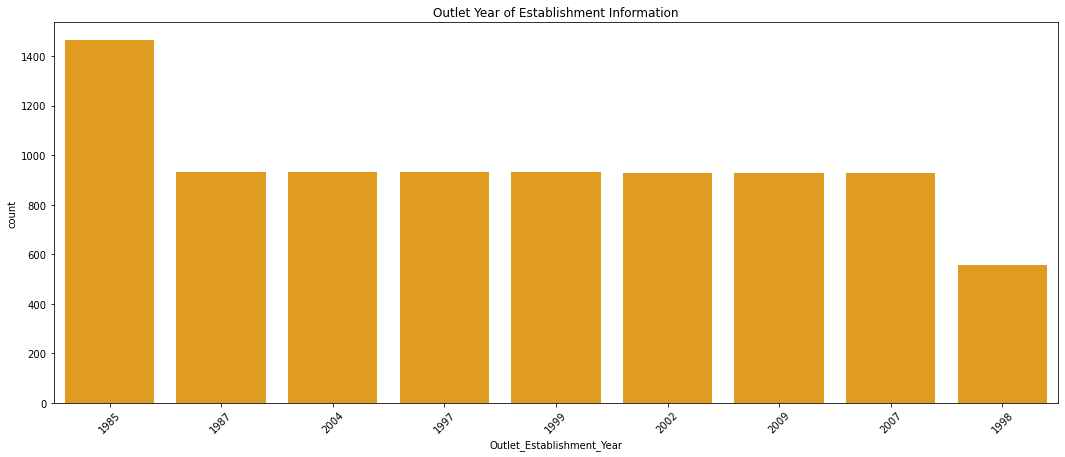

In [9]:
plt.figure(figsize=(18,7))
sns.countplot(x="Outlet_Establishment_Year", data=train_data, color="orange",
              order=train_data["Outlet_Establishment_Year"].value_counts().index)
plt.title("Outlet Year of Establishment Information")
plt.xticks(rotation=45);

## Observations:
- The oldest stores were established in 1985 and these have the largest chunk.
- The newest stores established was in 2009.
- Least number of stores were established in 1998.


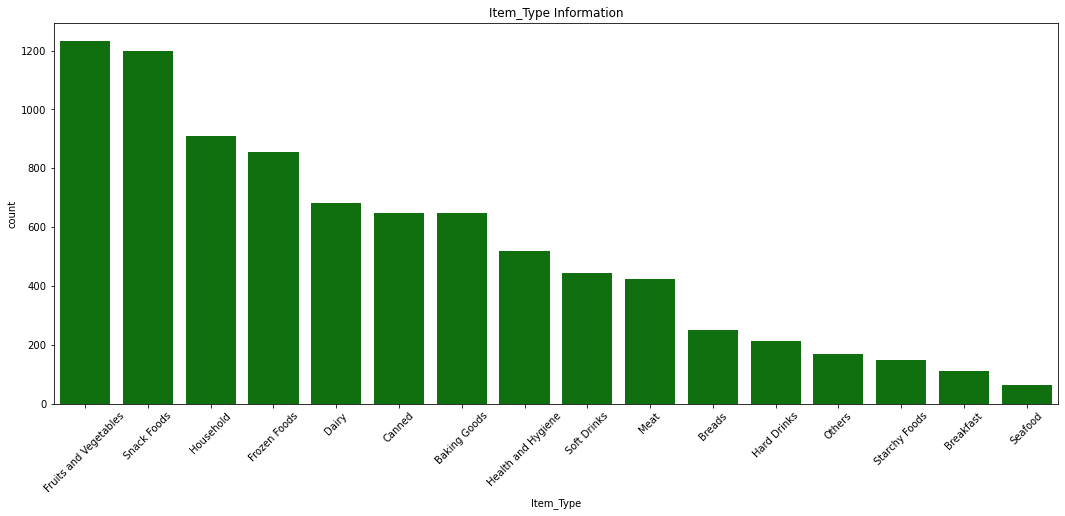

In [10]:
plt.figure(figsize=(18,7))
sns.countplot(x="Item_Type", data=train_data, color="green",
              order=train_data["Item_Type"].value_counts().index)
plt.title("Item_Type Information")
plt.xticks(rotation=45);

## Observations:
- Most items are Fruits followd by snacks and Household items.

**Lets fix the issues found in univariate analysis about the Item_Fat_Content**

In [ ]:
train_data["Item_Fat_Content"].unique()

In [11]:
def fat_rectification(value):
    if value == "LF" or value == "low fat":
        return "Low Fat"
    elif value == "reg":
        return "Regular"
    else:
        return value

train_data["Item_Fat_Content"] = train_data["Item_Fat_Content"].apply(fat_rectification)

train_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [12]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**We should perform the same transformations on our test data, Check the Test data and apply the same transformation**

In [13]:
test_data["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [14]:
test_data["Item_Fat_Content"] = test_data["Item_Fat_Content"].apply(fat_rectification)
test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## Visualizing the numerical data using histograms

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

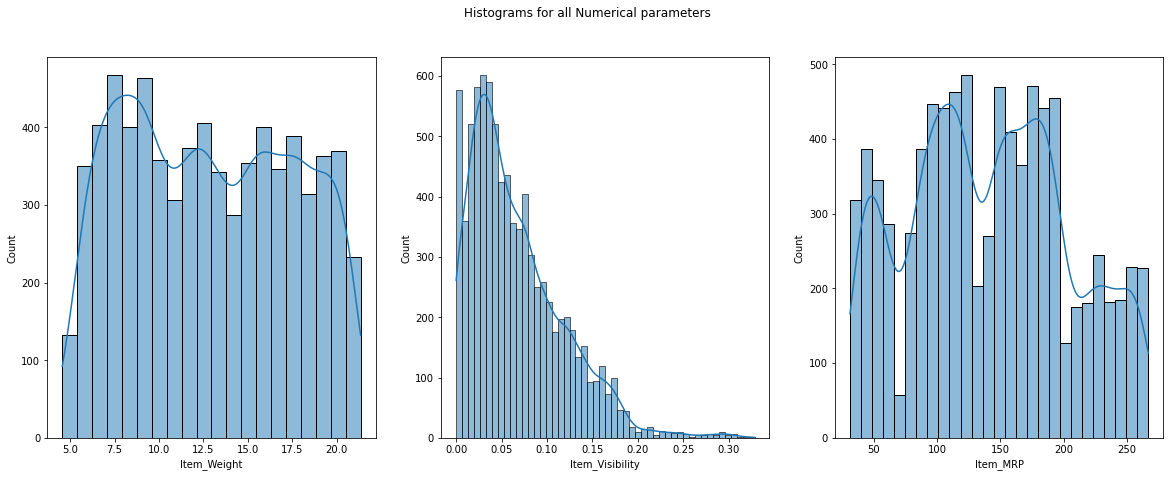

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle("Histograms for all Numerical parameters")
sns.histplot(x="Item_Weight", data=train_data, ax=axes[0], kde=True)
sns.histplot(x="Item_Visibility", data=train_data, ax=axes[1], kde=True)
sns.histplot(x="Item_MRP", data=train_data, ax=axes[2], kde=True)

## Observations:
- Item_Weight distribution is fairly uniform. While imputing missing values for this we should make sure we are not skewing the distribution.
- Item_Visibility is skewed to the right which implies the percentage of display area of certain items is higher than other items and many items might not get visibility because of them.
- Item_MRP has multimodal normal distribution.

## Insight
- Looking at these distributions I believe Normalization for scaling the values will be better as the distribution is not gaussian and standardization might not give us correct results.

## Bivariate Analysis

**Lets analyze Outlet_Establishment_Year and our output variable (Item_Outlet_Sales) is there a relationship between them?**

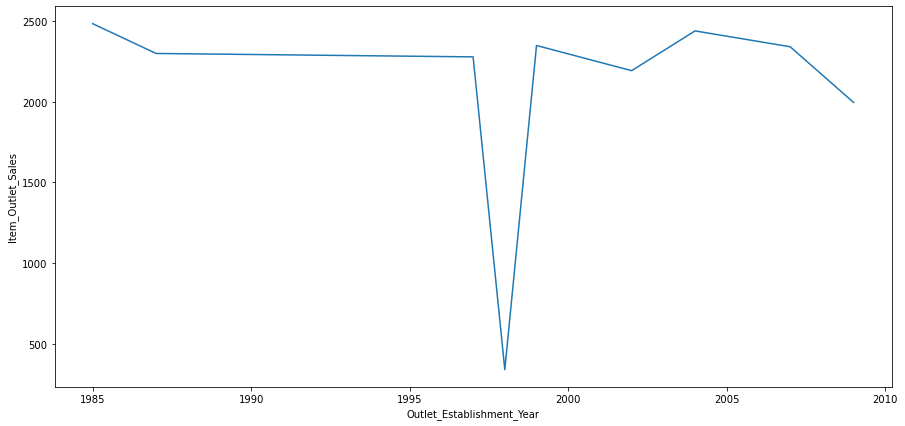

In [16]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=train_data, estimator="mean", ci=None)
plt.show()

## Observations:
- Least sales are in 1998, as we have already seen 1998 has least number of stores, it could be a factor for less sales. There could be some external factors why the company has not opened as many stores in 1998 and their sales being low.
- Apat from that we see conistent sales across the year of establishment, also we have seen number of stores are same for most years except very low in 1998 and largest in 1985 (and sales for outlets in 1985 established stores is high) 
- This suggests the sales are a factor of number of stores and do not have much relavance on them being young or old.

- This parameter will not contribute much in our predictions for item sales. We might as well drop this later.


## Lets Find the Correlation between different variables using Correlation Matrix

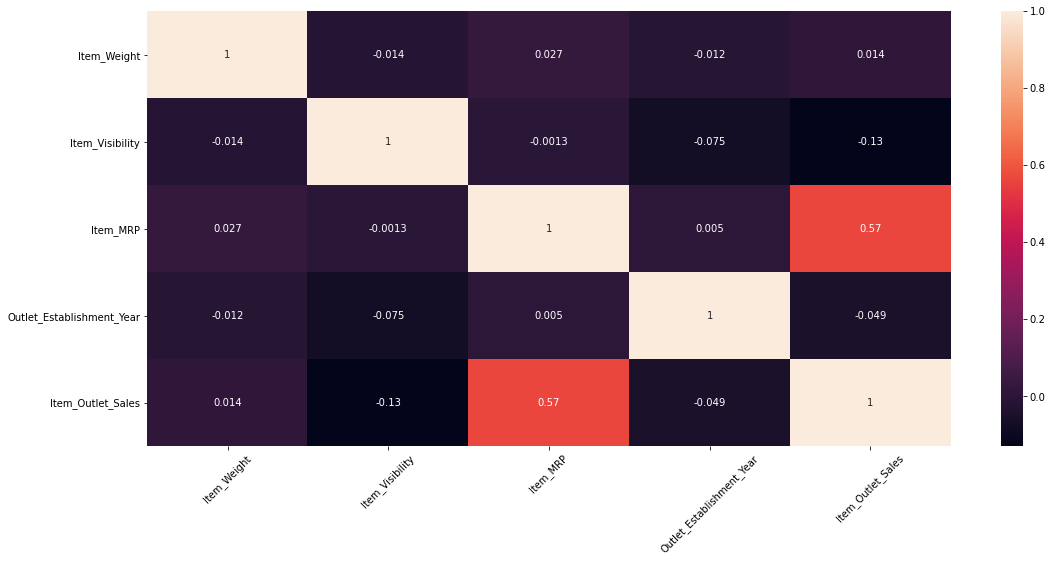

In [17]:
plt.figure(figsize=(18, 8))
sns.heatmap(train_data.corr(), annot=True)
plt.xticks(rotation=45);
plt.show()

## Observations:
- The only positive correlation we could see is between Item_MRP and our dependent variable (output) Item_Outlet_Sales.
- All other variables are pretty independent of each other. Not much relations between the variables.

**Lets see the Scatter plot for all pairs of variables**

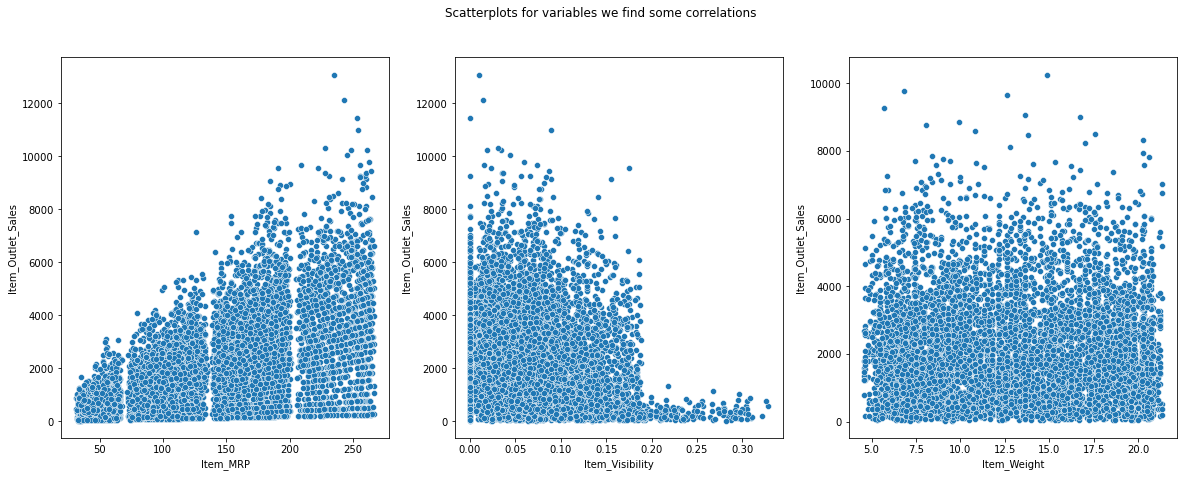

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle("Scatterplots for variables we find some correlations")
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=train_data, ax=axes[0]);
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=train_data, ax=axes[1]);
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=train_data, ax=axes[2]);

## Observations:
- As MRP increases the sales increased, a very good candidate for prediction.
- No relationship as such but Visibility incereases 0.19 we see dip in sales, maybe low sales items are put in high visibility places, not sure, will this help in predicitions maybe.
- Item_Weight has absolutely no relation and no visible pattern as well. 

## Imputing Missing Values (Careful imputation is necessary)
- Let us make sure the imputed values does not disrupt the whole dataset, thereby giving us wrong values.
- Item_Weight how is it related to other variables, this might give us an indication.

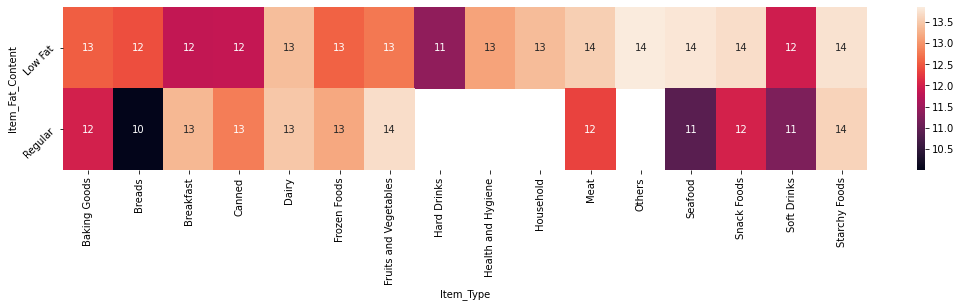

In [19]:
plt.figure(figsize=(18, 3))
sns.heatmap(train_data.pivot_table(index="Item_Fat_Content", columns="Item_Type", values="Item_Weight"), annot=True)
plt.yticks(rotation=45);
plt.show()

## Observations:
- Based on every combination we see the Item weight is ranging between 10 and 14.

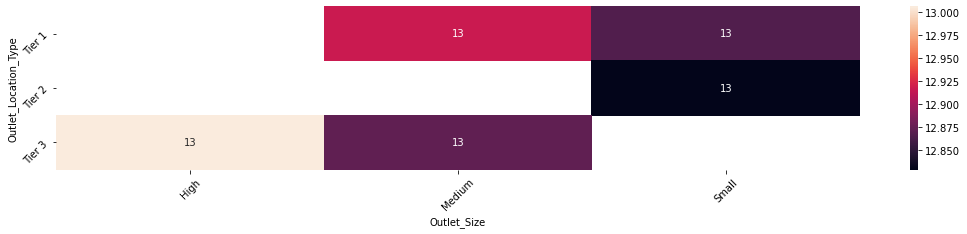

In [20]:
plt.figure(figsize=(18,3))
sns.heatmap(train_data.pivot_table(index="Outlet_Location_Type", columns="Outlet_Size", values="Item_Weight"), annot=True)
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.show()

## Observations:
- Item weight is 13 for allmost all possible values of outlet location and size.

**We can impute the weight as a uniform distribution between 10 and 14. Hopefully this will not change the relationships.**

In [21]:
item_weight_indices_to_be_updated = train_data[train_data["Item_Weight"].isnull()].index

# Adding the imputed uniform distribution between 10 to 14
train_data.loc[item_weight_indices_to_be_updated, "Item_Weight"] = np.random.uniform(10, 14, len(item_weight_indices_to_be_updated))


**Doing same for our test data**

In [22]:
test_item_weight_indices_to_be_updated = test_data[test_data["Item_Weight"].isnull()].index

# Adding the imputed uniform distribution between 10 and 14
test_data.loc[test_item_weight_indices_to_be_updated, "Item_Weight"] = np.random.uniform(10, 14, len(test_item_weight_indices_to_be_updated))

## Next lets impute valeus for Outlet Size
- This is a categorical variable with Small Medium and High as its possible values.
- From our pre processing we found that the highest number of outlet sized are Medium followed by Small and with very samll number of High size.
- We could impute the values to be Medium and Small randomly, but that might disrupt the relationships.
- To preserve the relationship with other variables we could take below approach:
    - Take all non-null values of Outlet size and check the Distribution w.r.t other variables of interest.
    - Take all the null values of Outlet Size and check the Distribution w.r.t same variables of interest.
    - If we find a pattern follow that to impute the values
    - Else we can impute Medium and Small as we thought we could.

    
**Lets Roll**


In [23]:
outlet_size_present = train_data[train_data["Outlet_Size"].notnull()]
outlet_size_absent = train_data[train_data["Outlet_Size"].isnull()]

**Looking at present distributions with Outlet_Type, Outet_Location_Type**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

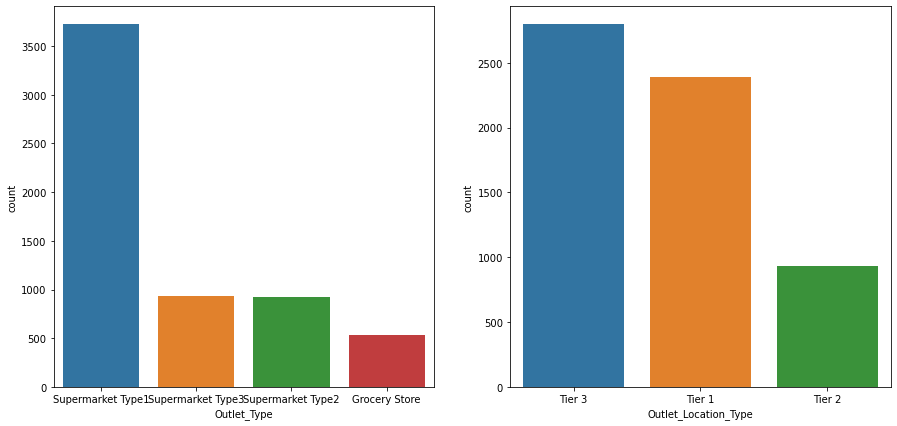

In [24]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(x="Outlet_Type", ax= axis[0], data=outlet_size_present, order=outlet_size_present["Outlet_Type"].value_counts().index)
sns.countplot(x="Outlet_Location_Type", ax=axis[1], data=outlet_size_present, order=outlet_size_present["Outlet_Location_Type"].value_counts().index)

**Checking the distribution where outlet size is absent**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

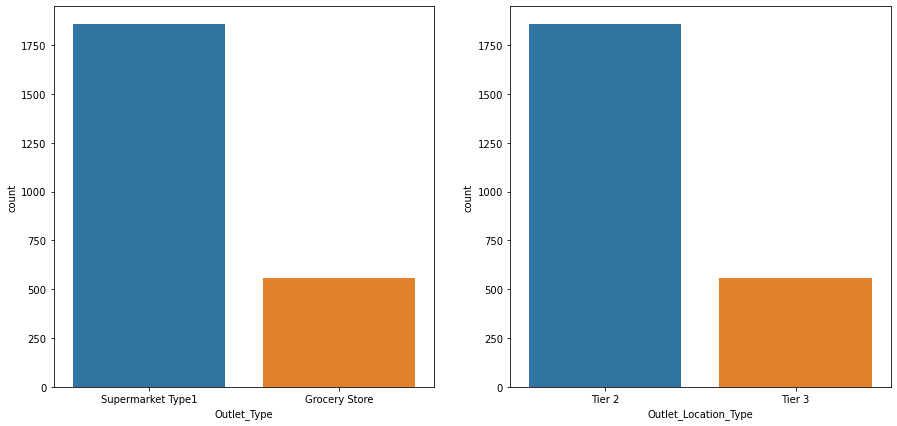

In [25]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(x="Outlet_Type", ax= axis[0], data=outlet_size_absent, order=outlet_size_absent["Outlet_Type"].value_counts().index)
sns.countplot(x="Outlet_Location_Type", ax=axis[1], data=outlet_size_absent, order=outlet_size_absent["Outlet_Location_Type"].value_counts().index)

## Observations:
- Most of the outlet type where outlet size is missing is Supermarket Type1 and grocery Stores.
- Most of the Locations where outlet size is missing is Tier2 and few are Tier3.
- This mean missing values are from smaller cities where we have either grocery store (which should be small) and supermarket Type 1 which should be medium. However, unless we further investigate the information we cannot be sure and should not jump to conclusion.
- Looking at the distribution where values are not missing SuperMarket Type 1 is max, and Tier3 is max (this is contrasting with absent info distribution).
- We need to analyze further what is the relation using a heatmap with count.

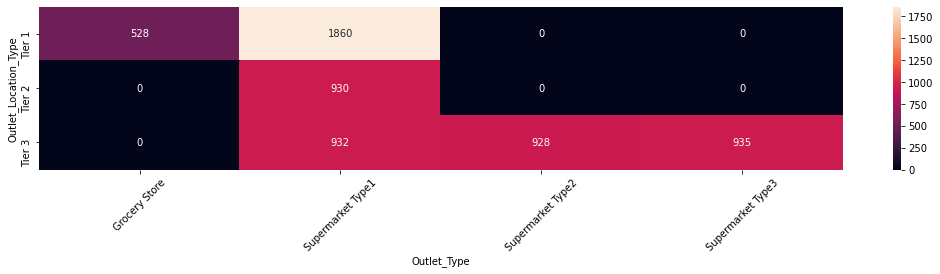

In [26]:
plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=outlet_size_present["Outlet_Location_Type"], columns=outlet_size_present["Outlet_Type"]), annot=True, fmt="g")
plt.xticks(rotation=45);
plt.show()

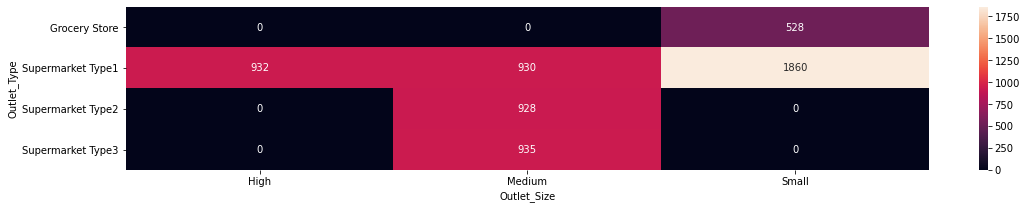

In [27]:
plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=outlet_size_present["Outlet_Type"], columns=outlet_size_present["Outlet_Size"]), annot=True, fmt="g")

plt.show()

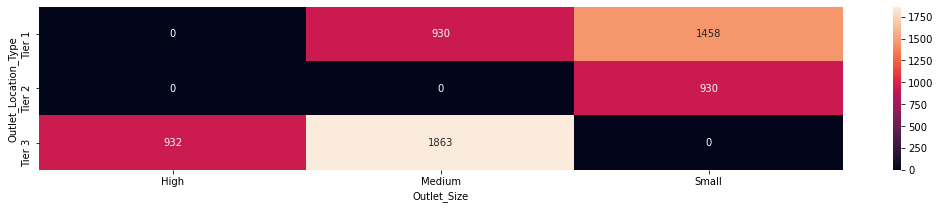

In [28]:
plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=outlet_size_present["Outlet_Location_Type"], columns=outlet_size_present["Outlet_Size"]), annot=True, fmt="g")

plt.show()

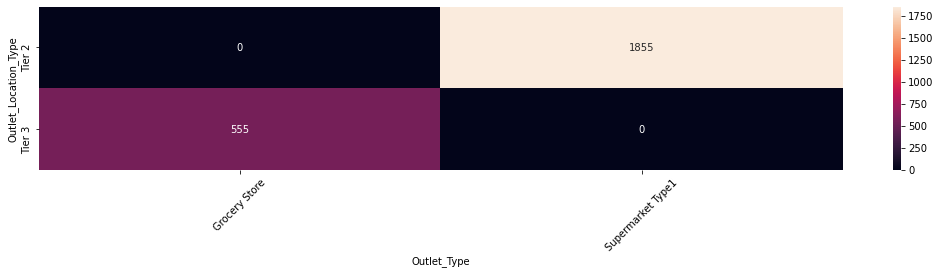

In [29]:
plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=outlet_size_absent["Outlet_Location_Type"], columns=outlet_size_absent["Outlet_Type"]), annot=True, fmt="g")
plt.xticks(rotation=45);
plt.show()

## Observations:
- Where Size is present:
    - Grocery Stores have some correlation with Tier1 Cities.
    - Small size is correlating highly with Supermarket Type 1 and some correlation with Grocery Stores.
    - This rings true as Tier1 stores have less space due to population desnsity.
    - This also suggests that both Grocery Stores and Supermarket Type 1 are in general associated with Outlet_Size = Small
    - Tier3 Cities do not have any small stores.

- Where Size is not Present:
    - Supermarket Type 1 are related to Tier2 Cities.
    - Grocecy Stores are related to Tier3 Cities.

- We have only small grocery stores no medium grocery stores.
- We have both small and medium size Supermarket Type 1
- All Tier 2 outlets are Small.

**To keep the relationships intact let us put values for outlet_size as small where we have grocery store**

**Let us also put Tier2 outlets where outlet_size is missing as small**

In [30]:
train_data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
train_data["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [32]:
# Getting outlet size null where we have grocery stores
grocery_outlet_absent = train_data[train_data["Outlet_Size"].isnull()].query("Outlet_Type == 'Grocery Store'").index
# Getting outlet size null where we have Tier2 cities
tier2_outlet_absent = train_data[train_data["Outlet_Size"].isnull()].query("Outlet_Location_Type == 'Tier 2'"). index

train_data.loc[grocery_outlet_absent, "Outlet_Size"] = "Small"
train_data.loc[tier2_outlet_absent, "Outlet_Size"] = "Small"

**Doing the same for test data**

In [33]:
# Getting outlet size null where we have grocery stores
grocery_outlet_absent_test = test_data[test_data["Outlet_Size"].isnull()].query("Outlet_Type == 'Grocery Store'").index
# Getting outlet size null where we have Tier2 cities
tier2_outlet_absent_test = test_data[test_data["Outlet_Size"].isnull()].query("Outlet_Location_Type == 'Tier 2'"). index

test_data.loc[grocery_outlet_absent_test, "Outlet_Size"] = "Small"
test_data.loc[tier2_outlet_absent_test, "Outlet_Size"] = "Small"

## Lets check how many more missing values we have got

In [34]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Observations:
- There are no other missing values.
- Our imputation worked well without need for next round of imputing for Outlet_Size.

## Feature Engineering

- As from preprocessing we see there are many features which do not give much information, but can we make them to have predictive power by transforming, combining and manipulating without losing data and potential information.
- One such observation is Store Establishment Year (Time yes, but kind of categorical). Except for the outlier of 1998. In out correlation matrix this did not show any significant impact or correlation with Outlet_Sales, does making it a continuous variable like store age make any difference. Maybe no, but checking and confirming it is important than concluding without checking.
**Lets Check it out**

In [36]:
# The data was collected in 2013 so lets subtract the outlet establishment year
train_data["Outlet_Age"] = 2013 - train_data["Outlet_Establishment_Year"]

# Lets do the same for test data
test_data["Outlet_Age"] = 2013 - test_data["Outlet_Establishment_Year"]

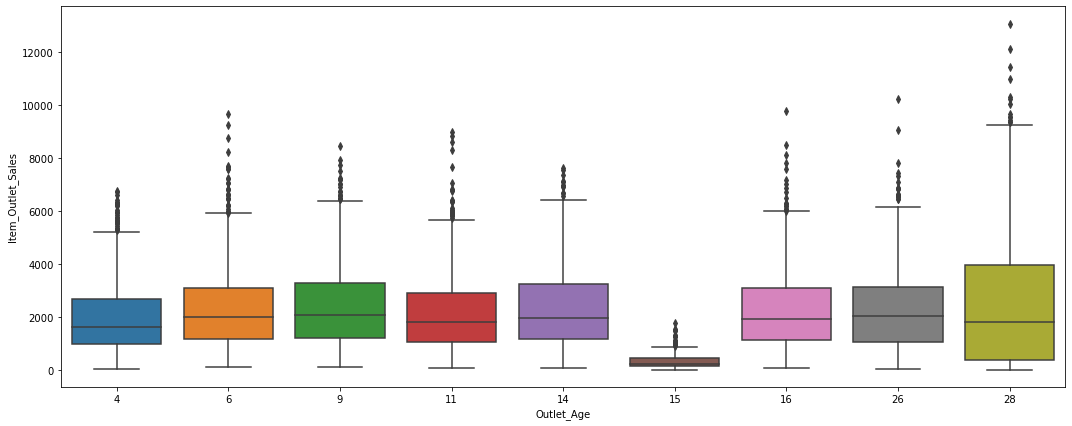

In [37]:
plt.figure(figsize=(18, 7))
sns.boxplot(x="Outlet_Age", y="Item_Outlet_Sales", data=train_data);

## Observations:
- As expected Not much predictive information. Fairly consistant with the number of stores opened in specific year as we saw in out pre processing analysis.
- The Anomaly of 15 year old outlets (established in 1998) can be seen.

## Modeling for prediction
- We saw in EDA not every independent variable is having an impact of Item_Outlet_Sales.
- Lets create a model with all variables, look at its predictive power then finetune by dropping those which are NOISE.

In [38]:
# Dropping the Outlet_Establishment_Year in both train and test data as Outlet_Age is present and this will lead to duplication of values.
# Lets also drop the output variable Item_Output_Sales to get our features.
train_features = train_data.drop(columns=["Outlet_Establishment_Year", "Item_Outlet_Sales"], axis=1)

train_target = train_data["Item_Outlet_Sales"]

## Categorical Variables replacement
- Lets replace categorical variables by one-hot encoding (dummy variables).
- Dropping the reference variable for now.

**I have researched on why should we drop the reference variable [this_article](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707) will give you better insight**

- Reference Variable helps in interpreting linear regression, but our OLS implementation will be be mired with multicolinearity if we do not and send us into Dummy Variable Hell 

In [39]:
# in linear based models it is mandatory to create dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first=True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Scaling the data
- As we have decided earlier while doing EDA we will be using MinMaxScaling
- Another very important consideration apart from existing data distribution not being gaussian is our dummy variable values, which are in o or 1. and meddling with them will decrease effectiveness of model we are trying to build.

**Scikit Learn has a good explanation for scaling the data [READ_THIS](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

In [40]:
scaler = MinMaxScaler()

train_features_scaled = scaler.fit_transform(train_features)
train_features_scaled = pd.DataFrame(train_features_scaled, index=train_features.index, columns=train_features.columns)
train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
# Adding intercept term to add constant that will make the model unbiased
# Mean of the residuals will be exactly 0.
# Stats_model pacakge contains OLS we want to use and also the add intercept
train_features_scaled = sm.add_constant(train_features_scaled)

# Apply OLS Model
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Lets just fit the data to model: Learn and estimate the parameters of the transformation
ols_res_0 = ols_model_0.fit()

In [42]:
print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     405.8
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:51:23   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### I will leave the below line and following code to remind me and others that its not always the model thats at fault, sometime We do silly mistakes and spend time debugging the wrong things.
**OMG I have never seen this: got 1 for R-squared and Adj-R-Squared. A perfect Prediction? Overfitting?**
#### The Cause of a perfect prediction was: I forgot to drop the output variable from train set. 

## The Debugging I tried to do (instead of checking my code above)

In [43]:
residual_0 = ols_res_0.resid
residual_0.mean()

3.185445701783307e-13

<AxesSubplot:ylabel='Count'>

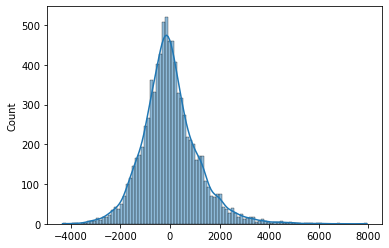

In [44]:
# Plot histogram of residuals
sns.histplot(residual_0, kde=True)

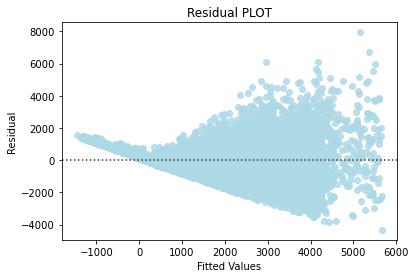

In [45]:
# predicted values
fitted = ols_res_0.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residual_0, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

## Observations on first Model
- R-Squared is 0.563
- The predictive power is generally gathered using p-values.

__Null Hypothesis__
- There is no relation between the independent variable and output variable.

__Alternate Hypothesis__
- There is some relation between independent variable and output variable.

**If p-value is less than the significance level of 0.05, we can reject our null hypothesis and accept the alternate hypothesis.**

## Feature Selection
Based on p-values, lets pick those which are significant (less than 0.05 p-value)
- These are: Item_MRP, Outlet_Age, Outlet_Size, Outlet_Location_Type and Outlet_Type
- When we plotted our Heat map the only significant relation we found was Item_MRP, but we got more with current analysis.

In [46]:
# Selecting the relevant features and creating train features:
train_features_2 = train_data[["Item_MRP", "Outlet_Age", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]]

In [47]:
train_features_2 = pd.get_dummies(train_features_2, drop_first=True)
train_features_2.head()

,Item_MRP,Outlet_Age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,14,1,0,0,0,1,0,0
1,48.2692,4,1,0,0,1,0,1,0
2,141.6180,14,1,0,0,0,1,0,0
3,182.0950,15,0,1,0,1,0,0,0
4,53.8614,26,0,0,0,1,1,0,0


In [48]:
# Scaling the variables
train_features_scaled_2 = scaler.fit_transform(train_features_2)
train_features_scaled_2 = pd.DataFrame(train_features_scaled_2, index=train_features_2.index, columns=train_features_2.columns)
train_features_scaled_2.head()

,Item_MRP,Outlet_Age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.927507,0.416667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.072068,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.468288,0.416667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.640093,0.458333,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.095805,0.916667,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Build the second model with refined dataset after feature selection

In [49]:
train_features_scaled_2 = sm.add_constant(train_features_scaled_2)
ols_model_1 = sm.OLS(train_target, train_features_scaled_2)
ols_res_1 = ols_model_1.fit()

In [50]:
print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1217.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:38:05   Log-Likelihood:                -71998.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8513   BIC:                         1.441e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations
- We got the same result for R-Squared: 0.563, which means these were the features helping in prediction in previous model too and those which were dropped never helped in predictions. We were good dropping those values. 
- However, our model is too weak to do pridictions, we need to finetune this.
OLS linear regression assumptions (for predictions):
1. No multicolinearity between independent variables.
2. Mean of residuals should be 0.
3. Normality of error terms.
4. Linearity of Variables.
5. No HeteroScedacity.

If data is not satisfying any of the above assumptions, the model will not work and we would be able to find the cause for such low R-Squared.

### Multicolinearity Check
- We have already plotted the heatmap (the correlation matrix) and we did not find high correlations between our variables.
- Let us work with Variations Inflation Factor and advanced method to remove any doubts.
    - How much variance of estimated regression parameter is inflated due to presence of correlations
    - 1 : No Correlation with other parameters
    - Close to 5: Moderate Correlation
    - Close to 10 and beyond: High Correlation.

In [51]:
# we drop the one with the highest vif value and check the Adjusted-R Squared
vif_series_1 = pd.Series([variance_inflation_factor(train_features_scaled_2.values, i) for i in range(train_features_scaled_2.shape[1])], index=train_features_scaled_2.columns)
print(vif_series_1)


const                            1703.138903
Item_MRP                            1.000182
Outlet_Age                         50.851534
Outlet_Size_Medium                110.890861
Outlet_Size_Small                 106.701575
Outlet_Location_Type_Tier 2        11.266788
Outlet_Location_Type_Tier 3        36.770793
Outlet_Type_Supermarket Type1      29.359000
Outlet_Type_Supermarket Type2       9.863086
Outlet_Type_Supermarket Type3      20.126350
dtype: float64


## Observation
- All variables except Item_MRP has high values. 
- The highest value is for Outlet_Size_Medium.
- As we cannot drop so many variable lets try with just removing the one with highest vif.

In [52]:
train_features_scaled_3 = train_features_scaled_2.drop(columns=["Outlet_Size_Medium"], axis=1)
ols_model_3 = sm.OLS(train_target, train_features_scaled_3)
ols_res_3 = ols_model_3.fit()

In [53]:
print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1367.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:07:35   Log-Likelihood:                -72002.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8514   BIC:                         1.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations:
- We do not see any improvement
- Lets see the VIF again to check how the correlation inflation is and what can be removed.

In [54]:
vif_series_2 = pd.Series([variance_inflation_factor(train_features_scaled_3.values, i) for i in range(train_features_scaled_3.shape[1])], index=train_features_scaled_3.columns)
print(vif_series_2)

const                            60.957867
Item_MRP                          1.000137
Outlet_Age                        5.032103
Outlet_Size_Small                 4.214391
Outlet_Location_Type_Tier 2       3.538163
Outlet_Location_Type_Tier 3       2.897614
Outlet_Type_Supermarket Type1     4.787661
Outlet_Type_Supermarket Type2     6.151776
Outlet_Type_Supermarket Type3     3.052102
dtype: float64


## Observations:
- Now the VIFs have decreased considerably, we can see Outlet_Age, Outlet_Type_Supermarket Type2 have the VIFs greater than 5.
- Lets drop the one which is highest Outlet_Type_Supermarket Type2     6.151776

In [56]:
train_features_scaled_4 = train_features_scaled_3.drop(columns=["Outlet_Type_Supermarket Type2"], axis=1)
ols_model_4 = sm.OLS(train_target, train_features_scaled_4)
ols_res_4 = ols_model_4.fit()

In [57]:
print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1491.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:13:46   Log-Likelihood:                -72113.
No. Observations:                8523   AIC:                         1.442e+05
Df Residuals:                    8515   BIC:                         1.443e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations:
- We see a decrease in R-Squared
- The Location Types have become insignificant. We need to drop them

In [58]:
vif_series_3 = pd.Series([variance_inflation_factor(train_features_scaled_4.values, i) for i in range(train_features_scaled_4.shape[1])], index=train_features_scaled_4.columns)
print(vif_series_3)

const                            21.573179
Item_MRP                          1.000087
Outlet_Age                        2.444472
Outlet_Size_Small                 2.985318
Outlet_Location_Type_Tier 2       3.523572
Outlet_Location_Type_Tier 3       2.832871
Outlet_Type_Supermarket Type1     2.887798
Outlet_Type_Supermarket Type3     2.580609
dtype: float64


In [59]:
train_features_scaled_5 = train_features_scaled_4.drop(['Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3'], axis=1)
ols_model_5 = sm.OLS(train_target, train_features_scaled_5)
ols_res_5 = ols_model_5.fit()

In [60]:
print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2087.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:18:37   Log-Likelihood:                -72114.
No. Observations:                8523   AIC:                         1.442e+05
Df Residuals:                    8517   BIC:                         1.443e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Checking Mean Residual is 0 and Normality of error terms

In [61]:
residual = ols_res_5.resid

In [62]:
residual.mean()

7.785207419479197e-13

**Residual very close to 0, we are good here**

<AxesSubplot:ylabel='Count'>

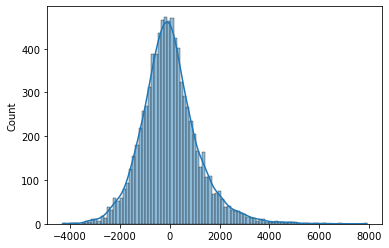

In [65]:
sns.histplot(residual,kde=True)

They are normally distributed, we do not need to make any changes.

## Linearity of variables (afterall this is linear regression!!)
- Predictor variables should have linear relationship with output variable.
- Residuals should be randomly and uniformly distributed without any visible pattern.

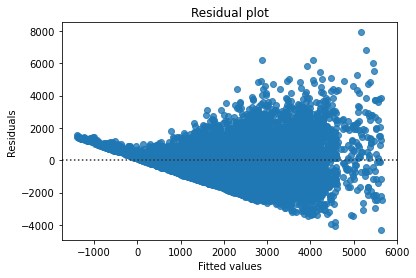

In [66]:
fitted = ols_res_5.fittedvalues
sns.residplot(x=fitted, y=residual)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

## Observations:
- Looks like we can see a pattern of residuals with respect to fitted values.
- We should be performing transformations to set this right. 
    - We will perform transformations: Lets check if log transformations on target variable can give better distribution of residuals for fitted values.

In [67]:
train_target_log = np.log(train_target)

In [68]:
ols_model_6 = sm.OLS(train_target_log, train_features_scaled_5)
ols_res_6 = ols_model_6.fit()

In [69]:
print(ols_res_6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3540.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:43:54   Log-Likelihood:                -7446.2
No. Observations:                8523   AIC:                         1.490e+04
Df Residuals:                    8517   BIC:                         1.495e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations:
- We see that our R-Squared has increased to 0.675, which is good. 
- Now lets check the residuals again.

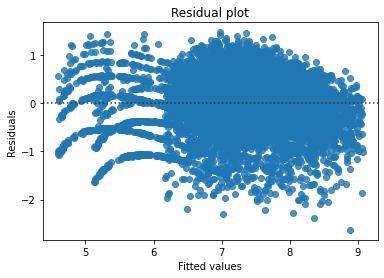

In [70]:
residual_1 = ols_res_6.resid
fitted_1 = ols_res_6.fittedvalues
sns.residplot(x=fitted_1, y=residual_1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

## Observations:
- No defined pattern. That means the linearity principle is satisfied. 
- Now the final assumption : No HeteroScedacity

## No Heteroscadacity
- Variance of residuals is symmetrically distributed and no pattern or any cone shape.
- Otherwise its Heteroscadacity and we will have to further work on our data, otherwise the model built is unusable.
- We have already seen residual plot. But just to be sure lets also use Goldfield-Quandt test.
    - Null Hypothesis : HomoScedacity
    - Alternate Hypothesis - HeteroScedacity

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F-statistic", 'p-value']

In [73]:
test = sms.het_goldfeldquandt(train_target_log, train_features_scaled_5)
lzip(name, test)

[('F-statistic', 0.958609201552806), ('p-value', 0.915998423511878)]

## Observations:
- p-value greater than 0.05 so we can go with null hypothesis, which is HomoScedacity.

All assumptions taken care of.
We do not have anymore to do to increase the R-Squared (Or Maybe I spent too much time analyzing)
Its time to test the model created.
The final equation for linear regression we got is : 

**log(Item_Outlet_Sales) = 6.1604 + 1.9623(Item_MRP) - 1.0049∗Outlet_Age − 0.5812∗Outlet_Size_Small + 1.2249∗Outlet_Type_Supermarket Type1 + 1.9662∗Outlet_Type_Supermarket Type3**


In [75]:
without_const=train_features_scaled_2.iloc[:,1:]
test_features = pd.get_dummies(test_data, drop_first=True)
test_features = test_features[list(without_const)]
test_features_scaled = scaler.fit_transform(test_features)
test_features_scaled = pd.DataFrame(test_features_scaled, columns=without_const.columns)
test_features_scaled = sm.add_constant(test_features_scaled)
test_features_scaled.head()

,const,Item_MRP,Outlet_Age,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.323413,0.416667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.235849,0.083333,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.894140,0.458333,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.524488,0.083333,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.862069,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [76]:
test_features_scaled = test_features_scaled[train_features_scaled_5.columns]
test_features_scaled

,const,Item_MRP,Outlet_Age,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,1.0,0.323413,0.416667,0.0,1.0,0.0
1,1.0,0.235849,0.083333,1.0,1.0,0.0
2,1.0,0.894140,0.458333,1.0,0.0,0.0
3,1.0,0.524488,0.083333,1.0,1.0,0.0
4,1.0,0.862069,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...
5676,1.0,0.466011,0.500000,1.0,1.0,0.0
5677,1.0,0.584637,0.000000,0.0,0.0,0.0
5678,1.0,0.369798,0.291667,1.0,1.0,0.0
5679,1.0,0.778487,0.083333,1.0,1.0,0.0


## Evaluations:
1. R-Squared
2. mean squared error
3. Root mean squared error

In [78]:
print(ols_res_6.rsquared)

0.6751411673487511


In [79]:
print(ols_res_6.mse_model)
print(ols_res_6.mse_resid)

1190.42069566905
0.3362667409042841


In [80]:
print(np.sqrt(ols_res_6.mse_resid))

0.5798851100901662


## Finally the moment of truth
- Are we fitting it right. Is is underfitting or overfitting. Are we on target yet or have we failed?

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cvscore_1 = cross_val_score(lr, train_features_scaled_5, train_target_log, cv=10)
cvscore_2 = cross_val_score(lr, train_features_scaled_5, train_target_log, cv=10, scoring="neg_mean_squared_error")

print(f"R-Squared Estimation validation: {format(cvscore_1.mean(), '0.3f')} with Standard Diviation (+/- {format(cvscore_1.std(), '0.3f')})")
print(f"Mean Squared Estimation validation: {format(cvscore_2.mean(), '0.3f')} with Standard Diviation (+/- {format(cvscore_2.std(), '0.3f')})")

R-Squared Estimation validation: 0.673 with Standard Diviation (+/- 0.029)
Mean Squared Estimation validation: -0.337 with Standard Diviation (+/- 0.015)


## Observations:
- Cross Validation is successful. We get almost similar R-Squared and Mean Squared on training set.
- Seems like its giving generalized performance.

## Test Data Predictions
_We have passed through many steps, lets predict on test data. Wish me Luck_

In [85]:
test_predictions = ols_res_6.predict(test_features_scaled)

# As we have transformed the predictions to log of Item_Outlet_Sales, lets covert it back.
test_pred_inverse_trsfm = np.exp(test_predictions)

<AxesSubplot:ylabel='Count'>

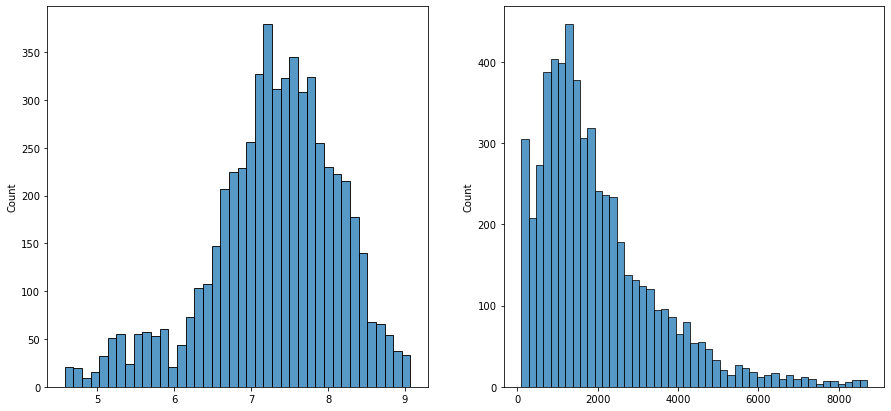

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(test_predictions, ax=axes[0])
sns.histplot(test_pred_inverse_trsfm, ax=axes[1])


In [87]:
test_pred_inverse_trsfm

0       2000.608265
1       1317.098371
2        966.097333
3       2320.628124
4       6723.760387
           ...     
5676    1361.194601
5677    1491.711208
5678    1389.469848
5679    3820.074925
5680    1003.140114
Length: 5681, dtype: float64

In [88]:
test_data["Predicted_Item_Outlet_Sales"] = test_pred_inverse_trsfm

test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Predicted_Item_Outlet_Sales
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,14,2000.608265
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1,6,1317.098371
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Small,Tier 3,Grocery Store,15,966.097333
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Small,Tier 2,Supermarket Type1,6,2320.628124
4,10.332819,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,28,6723.760387


In [90]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Predicted_Item_Outlet_Sales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.568161,0.065684,141.023273,1997.828903,15.171097,1978.218063
std,4.280921,0.051252,61.809091,8.372256,8.372256,1477.543764
min,4.555000,0.000000,31.990000,1985.000000,4.000000,97.043159
25%,9.195000,0.027047,94.412000,1987.000000,9.000000,936.879942
50%,12.161228,0.054154,141.415400,1999.000000,14.000000,1596.178742
75%,15.850000,0.093463,186.026600,2004.000000,26.000000,2603.609633
max,21.350000,0.323637,266.588400,2009.000000,28.000000,8701.570414


In [96]:
test_data.sort_values(by="Predicted_Item_Outlet_Sales", ascending=False).head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Predicted_Item_Outlet_Sales
3619,11.204884,Regular,0.073790,Snack Foods,265.0568,1985,Medium,Tier 3,Supermarket Type3,28,8701.570414
3114,13.906026,Low Fat,0.140668,Dairy,264.4884,1985,Medium,Tier 3,Supermarket Type3,28,8660.297191
5037,12.481108,Low Fat,0.069282,Starchy Foods,263.5252,1985,Medium,Tier 3,Supermarket Type3,28,8590.802822
918,11.175505,Regular,0.019417,Dairy,263.4910,1985,Medium,Tier 3,Supermarket Type3,28,8588.345589
681,13.140767,Low Fat,0.022772,Frozen Foods,263.2594,1985,Medium,Tier 3,Supermarket Type3,28,8571.723861
931,12.598003,Low Fat,0.136148,Dairy,263.2568,1985,Medium,Tier 3,Supermarket Type3,28,8571.537444
5348,11.443609,Low Fat,0.123903,Canned,263.0884,1985,Medium,Tier 3,Supermarket Type3,28,8559.471990
3235,12.752515,Low Fat,0.069701,Dairy,262.9226,1985,Medium,Tier 3,Supermarket Type3,28,8547.609413
2793,11.461707,Low Fat,0.065750,Hard Drinks,261.8278,1985,Medium,Tier 3,Supermarket Type3,28,8469.690818
1375,10.215996,Low Fat,0.103725,Health and Hygiene,261.7278,1985,Medium,Tier 3,Supermarket Type3,28,8462.609166


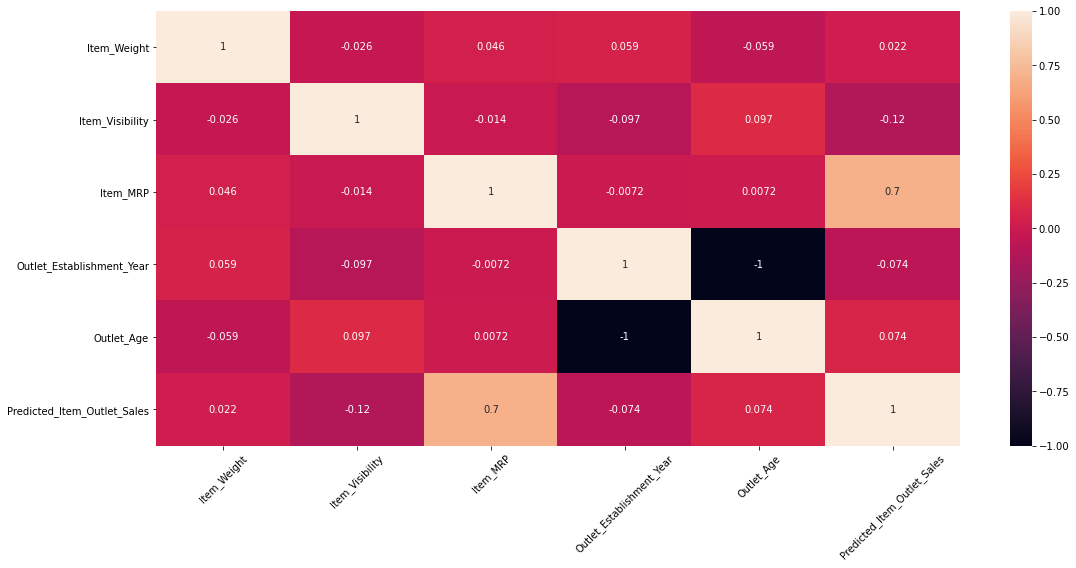

In [89]:
plt.figure(figsize=(18, 8))
sns.heatmap(test_data.corr(), annot=True)
plt.xticks(rotation=45);
plt.show()

## Conclusion and Recommendations
Based on the linear regression equation:

**log(Item_Outlet_Sale) = 6.1604 + 1.9623∗Item_MRP - 1.0049∗Outlet_Age − 0.5812∗Outlet_Size_Small + 1.2249∗Outlet_Type_Supermarket Type1 + 1.9662∗
 Outlet_Type_Supermarket Type3**

## Conclusion:
 - log of Item_Outlet_Sale increases by 1.9632 time with one unit change in Item MRP.
 - On average the item sales for Small size outlets are 0.5 times smaller than the item sales of high (which was our reference variable we dropped)
 - log of items sales for outlets of type grocery stores are less by 1.22 times from  Supermarket Type 1 and 1.96 times from Supermarket Type 3.  
 
 ## Recommendations
 - Sales in large stores like Supermarket Type 3 has more sales than others. These sales of these stores should be maintains and if possible improved.
 - Sales in other smaller stores such as grocery stores and others need strategic planning to improve the sales. 